### Max-Cut Benchmark on Qiskit Runtime
This notebook provides all the tools needed to execute the benchmark program using Qiskit Runtime Service.
Here, we assemble the benchmark files and data into a single .py file and .json file and upload it to Runtime.
Then, the benchmark is executed, collects data, and returns those data in an object which we then save to local files.
We then execute the plot function to illustrate results.

In [1]:
from qiskit_ibm_runtime import Sampler, Session


### Setting Parameters 

In [2]:
min_qubits=4
max_qubits=6
max_circuits=1
num_shots=1000

degree = 3
rounds = 2
max_iter = 30
parameterized = True
use_fixed_angles=False

max_execution_time = 100_000 # seconds

backend_id="ibmq_qasm_simulator"
hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = None

# *** If using IBMQ hardware, run this once to authenticate
from qiskit_ibm_runtime import QiskitRuntimeService
#Another valid option for channel is "ibm_cloud"
QiskitRuntimeService.save_account(channel="ibm_quantum", token="44f57dd2858c10a910766348edb2805203f22247c8c7d959ab120f0f757259b5a886e9fc2180c24fb965528a4c8844881551a21483c820ad5eef3e3830bf291d",overwrite=True)

# # *** If you are part of an IBMQ group, set hub, group, and project name here
# hub="YOUR_HUB_NAME"
# group="YOUR_GROUP_NAME"
# project="YOUR_PROJECT_NAME"

# # *** This example shows how to specify the backend using a known "backend_id"
# # Use 'sabre' layout for IBM backends
# exec_options = { "optimization_level":3, "layout_method":'sabre', "routing_method":'sabre' }
# backend_id="ibmq_belem"

# # *** Here's an example of using a typical custom provider backend (e.g. AQT simulator)
# import os
# from qiskit_aqt_provider import AQTProvider
# provider = AQTProvider(os.environ.get('AQT_ACCESS_KEY'))    # get your key from environment
# provider_backend = provider.backends.aqt_qasm_simulator_noise_1
# backend_id="aqt_qasm_simulator_noise_1"

# # An example using IonQ provider
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()   # Be sure to set the QISKIT_IONQ_API_TOKEN environment variable
# provider_backend = provider.get_backend("ionq_qpu")
# backend_id="ionq_qpu"

# # *** Use these settings for better results
# min_qubits=4
# max_qubits=10
# max_circuits=2
# num_shots=50000

# For execution on Qiskit Runtime Service
from qiskit_ibm_runtime import QiskitRuntimeService
import runtime_utils

# If interactive true -> ask user before continuing to execute
interactive = True

Exception Unrecognised argument(s): encoding occured while configuring logger: bypassing logger config to prevent data loss


In [3]:
# Custom optimization options can be specified in this cell (below is an example)

# # Add Qiskit pass manager as a custom 'transformer' method
# import _common.transformers.qiskit_passmgr as qiskit_passmgr
# exec_options = { "optimization_level": 3, "layout_method":'sabre', "routing_method":'sabre', "transformer": qiskit_passmgr.do_transform }

# # Example of TrueQ Randomized Compilation
# import _common.transformers.trueq_rc as trueq_rc
# exec_options = { "optimization_level":3, "layout_method":'sabre', "routing_method":'sabre', "transformer": trueq_rc.local_rc } 

# # Define a custom noise model to be used during execution
# import _common.custom.custom_qiskit_noise_model as custom_qiskit_noise_model
# exec_options = { "noise_model": custom_qiskit_noise_model.my_noise_model() }


### Check the Status of Any Previous Job

In [4]:
# Determine whether a job has been previously run in this folder. 
# If so, obtain the job_id and job status stored locally
job, job_status = runtime_utils.get_jobinfo(backend_id)

do_execute = True

# if there is a prior job, get job from job_id (to be moved to runtime_utils)
if job:
    print(f"Job {job.job_id} is {job_status}")
    
    # if running, ask for continue and wait, or abort?
    # DEV NOTE: User could accidentally overwrite data
    if job_status == "RUNNING": 
        response = "y"
        if interactive:
            response = input("... a RUNNING job was found, continue to wait for completion? (y/n)")

        if response.strip().lower() == "y":
            do_execute = False
    
    # if DONE and not always_overwrite, do you want to overwrite ? if true set execute=True
    if job_status == "DONE":
        response = "y"
        if interactive:
            response = input("... a DONE job was found, re-execute and OVERWRITE data? (y/n)")

        if response.strip().lower() == "n":
            do_execute = False
    

### Preparing Instances and Upload

In [5]:
if do_execute:

    # Creating runtime script to be uploaded
    RUNTIME_FILENAME = 'maxcut_runtime.py'
    runtime_utils.create_runtime_script(file_name=RUNTIME_FILENAME)
    
    # Read instance files into single dict to pass as runtime input
    insts = runtime_utils.prepare_instances()

    import uuid

    # Meta data required by qiskit runtime
    meta = {
        "name": f"qedc-maxcut-benchmark-{uuid.uuid4()}",
        "description": "A sample Maxcut Benchmark program.",
        "max_execution_time": 100_000,
        "version": "1.0",
    }

    service = QiskitRuntimeService()
    

    #program_id = service.upload_program(data=RUNTIME_FILENAME, metadata=meta)

In [6]:
import maxcut_runtime

/var/folders/7c/h5xjs6416sgc2k4j47lsk3ym0000gn/T/ipykernel_14233/1684253962.py:1: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  import maxcut_runtime


__init__.discover_credentials:INFO:2023-06-05 04:24:30,200: Using credentials from qiskitrc


MaxCut Benchmark Program - Qiskit
... execution starting at Jun 05, 2023 11:24:30 UTC
************
Executing [1] restarts for num_qubits = 4


sampler._run:INFO:2023-06-05 04:24:50,934: Submitting job using options {'optimization_level': 1, 'resilience_level': 0, 'max_execution_time': None, 'transpilation': {'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None}, 'resilience': {'noise_amplifier': 'TwoQubitAmplifier', 'noise_factors': (1, 3, 5), 'extrapolator': 'LinearExtrapolator'}, 'execution': {'shots': 1000, 'init_qubits': True}, 'environment': {'log_level': 'WARNING', 'callback': None, 'job_tags': []}, 'simulator': {'noise_model': None, 'seed_simulator': None, 'coupling_map': None, 'basis_gates': None}}
sampler._run:INFO:2023-06-05 04:24:58,355: Submitting job using options {'optimization_level': 1, 'resilience_level': 0, 'max_execution_time': None, 'transpilation': {'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None}, 'resilience': {'noise_amplifier': 'TwoQubitAmplifier'

sampler._run:INFO:2023-06-05 04:26:19,643: Submitting job using options {'optimization_level': 1, 'resilience_level': 0, 'max_execution_time': None, 'transpilation': {'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None}, 'resilience': {'noise_amplifier': 'TwoQubitAmplifier', 'noise_factors': (1, 3, 5), 'extrapolator': 'LinearExtrapolator'}, 'execution': {'shots': 1000, 'init_qubits': True}, 'environment': {'log_level': 'WARNING', 'callback': None, 'job_tags': []}, 'simulator': {'noise_model': None, 'seed_simulator': None, 'coupling_map': None, 'basis_gates': None}}
sampler._run:INFO:2023-06-05 04:26:23,372: Submitting job using options {'optimization_level': 1, 'resilience_level': 0, 'max_execution_time': None, 'transpilation': {'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None}, 'resilience': {'noise_amplifier': 'TwoQubitAmplifier'

sampler._run:INFO:2023-06-05 04:27:24,883: Submitting job using options {'optimization_level': 1, 'resilience_level': 0, 'max_execution_time': None, 'transpilation': {'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None}, 'resilience': {'noise_amplifier': 'TwoQubitAmplifier', 'noise_factors': (1, 3, 5), 'extrapolator': 'LinearExtrapolator'}, 'execution': {'shots': 1000, 'init_qubits': True}, 'environment': {'log_level': 'WARNING', 'callback': None, 'job_tags': []}, 'simulator': {'noise_model': None, 'seed_simulator': None, 'coupling_map': None, 'basis_gates': None}}
sampler._run:INFO:2023-06-05 04:27:29,899: Submitting job using options {'optimization_level': 1, 'resilience_level': 0, 'max_execution_time': None, 'transpilation': {'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None}, 'resilience': {'noise_amplifier': 'TwoQubitAmplifier'

************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 40, 0.5
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 40, 0.5, 24.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.0, 0.698, 0.0 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 1.0, 1.0

************
Executing [1] restarts for num_qubits = 6


sampler._run:INFO:2023-06-05 04:27:47,173: Submitting job using options {'optimization_level': 1, 'resilience_level': 0, 'max_execution_time': None, 'transpilation': {'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None}, 'resilience': {'noise_amplifier': 'TwoQubitAmplifier', 'noise_factors': (1, 3, 5), 'extrapolator': 'LinearExtrapolator'}, 'execution': {'shots': 1000, 'init_qubits': True}, 'environment': {'log_level': 'WARNING', 'callback': None, 'job_tags': []}, 'simulator': {'noise_model': None, 'seed_simulator': None, 'coupling_map': None, 'basis_gates': None}}
sampler._run:INFO:2023-06-05 04:28:00,342: Submitting job using options {'optimization_level': 1, 'resilience_level': 0, 'max_execution_time': None, 'transpilation': {'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None}, 'resilience': {'noise_amplifier': 'TwoQubitAmplifier'

sampler._run:INFO:2023-06-05 04:28:42,387: Submitting job using options {'optimization_level': 1, 'resilience_level': 0, 'max_execution_time': None, 'transpilation': {'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None}, 'resilience': {'noise_amplifier': 'TwoQubitAmplifier', 'noise_factors': (1, 3, 5), 'extrapolator': 'LinearExtrapolator'}, 'execution': {'shots': 1000, 'init_qubits': True}, 'environment': {'log_level': 'WARNING', 'callback': None, 'job_tags': []}, 'simulator': {'noise_model': None, 'seed_simulator': None, 'coupling_map': None, 'basis_gates': None}}
sampler._run:INFO:2023-06-05 04:28:45,006: Submitting job using options {'optimization_level': 1, 'resilience_level': 0, 'max_execution_time': None, 'transpilation': {'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None}, 'resilience': {'noise_amplifier': 'TwoQubitAmplifier'

sampler._run:INFO:2023-06-05 04:29:54,579: Submitting job using options {'optimization_level': 1, 'resilience_level': 0, 'max_execution_time': None, 'transpilation': {'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None}, 'resilience': {'noise_amplifier': 'TwoQubitAmplifier', 'noise_factors': (1, 3, 5), 'extrapolator': 'LinearExtrapolator'}, 'execution': {'shots': 1000, 'init_qubits': True}, 'environment': {'log_level': 'WARNING', 'callback': None, 'job_tags': []}, 'simulator': {'noise_model': None, 'seed_simulator': None, 'coupling_map': None, 'basis_gates': None}}
sampler._run:INFO:2023-06-05 04:31:57,699: Submitting job using options {'optimization_level': 1, 'resilience_level': 0, 'max_execution_time': None, 'transpilation': {'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None}, 'resilience': {'noise_amplifier': 'TwoQubitAmplifier'

************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 34, 0.5
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 34, 0.5, 36.0
Average Creation, Elapsed, Execution Time for the 6 qubit group = 0.001, 10.78, 0.0 secs
Average Hellinger, Normalized Fidelity for the 6 qubit group = 1.0, 1.0

... execution complete at Jun 05, 2023 11:32:21 UTC in 471.171 secs

Sample Circuit:
        ┌───┐                                                                »
   q_0: ┤ H ├─■───────────────■───────────────────────────────■──────────────»
        ├───┤ │ZZ(-1.0*𝞬[0])  │                               │              »
   q_1: ┤ H ├─■───────────────┼───────────────■───────────────┼──────────────»
        ├───┤                 │               │ZZ(-1.0*𝞬[0])  │              »
   q_2: ┤ H ├─────────────────┼───────────────■───────────────┼──────────────»
        ├───┤                 │                               │              »
   q_3: ┤ H ├────────

/Users/ninja/research/Quantum_Research/SRI_Internship/QC-App-Oriented-Benchmarks/maxcut/qiskit/maxcut_runtime.py:3120: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  plt.xlim(x_min - step/2, x_max + step/2)


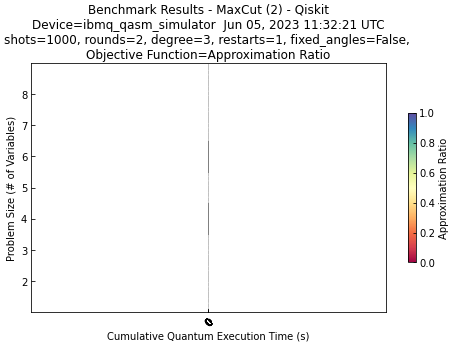

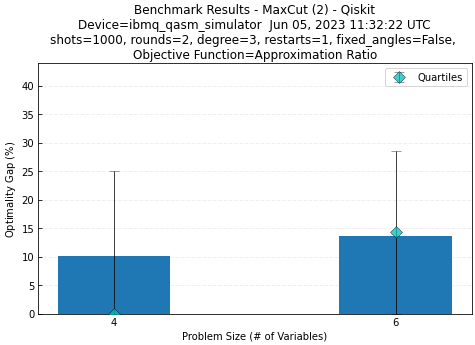

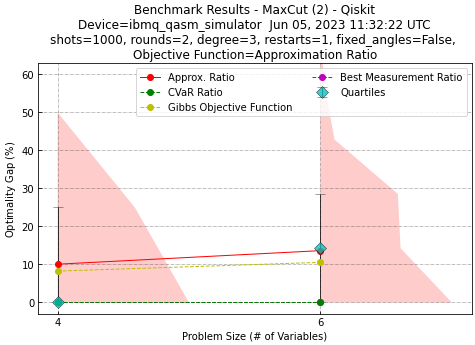

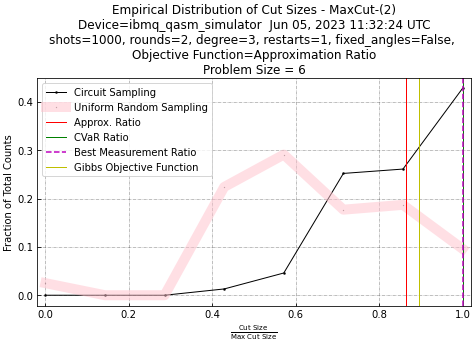

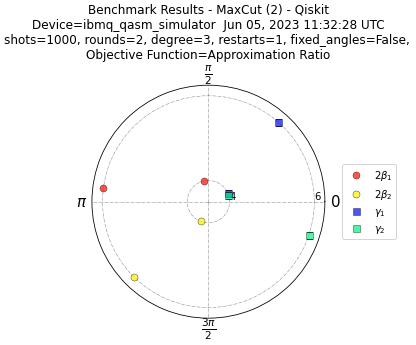

In [7]:
if do_execute:

    options = {
        'backend_name': backend_id
    }

    runtime_inputs = {
        "backend_id": backend_id,
        "method": 2,
        "_instances": insts,
        "min_qubits": min_qubits,
        "max_qubits": max_qubits,
        "max_circuits": max_circuits,
        "num_shots": num_shots,

        "degree": degree,
        "rounds": rounds,
        "max_iter": max_iter,
        "parameterized": parameterized,
        "use_fixed_angles": use_fixed_angles,
        "do_fidelities": False,
        "score_metric": "approx_ratio",
        "exec_options": exec_options if exec_options else {"noise_model": None},
        "use_Sessions": True,

        # To keep plots consistent
        "hub": hub,
        "group": group,
        "project": project
    }
    
    
    
    
    job = maxcut_runtime.run(**runtime_inputs)
        

    #runtime_utils.save_jobinfo(backend_id, job.job_id, "RUNNING")

#     print(f'{job.creation_date.ctime() = }')
#     print(f'{job.job_id = }')
#     print(f'{job.program_id = }')

### Configuring Inputs and Execute

__init__.discover_credentials:INFO:2023-05-23 01:53:08,599: Using credentials from qiskitrc


MaxCut Benchmark Program - Qiskit
... execution starting at May 23, 2023 08:53:08 UTC
************
Executing [1] restarts for num_qubits = 4
... error occurred during job.status() for circuit 4 1008 -- retry 1
... error occurred during job.status() for circuit 4 1024 -- retry 1
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 40, 0.5
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 40, 0.5, 24.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.0, 15.574, 0.02 secs
Average Transpiling, Validating, Running Times for group 4 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 1.0, 1.0

************
Executing [1] restarts for num_qubits = 6
************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 34, 0.5
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 34, 0.5, 36.0
Average Creation, Elapsed, Execution Time for the 6 qubit gr

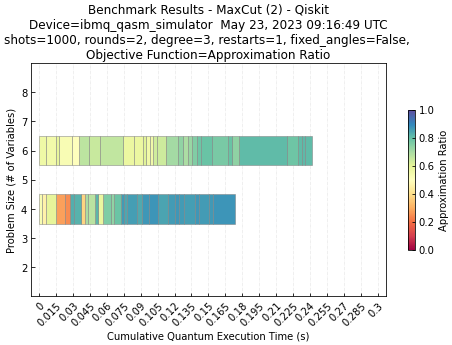

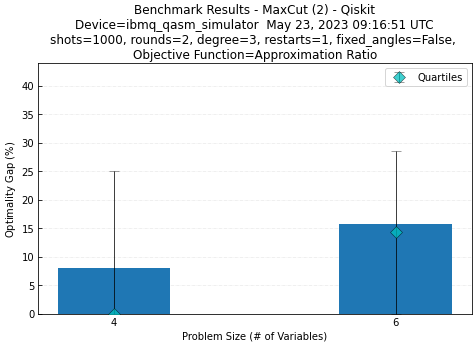

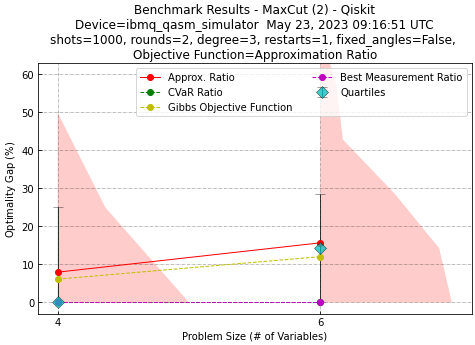

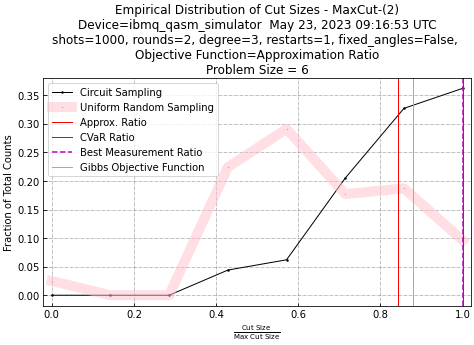

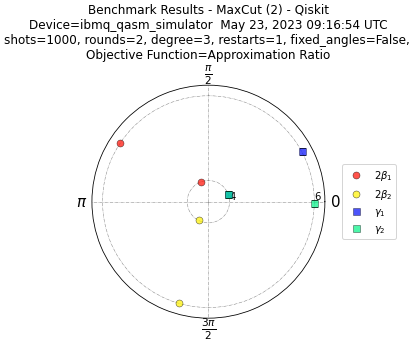

In [7]:
if do_execute:

    options = {
        'backend_name': backend_id
    }

    runtime_inputs = {
        "backend_id": backend_id,
        "method": 2,
        "_instances": insts,
        "min_qubits": min_qubits,
        "max_qubits": max_qubits,
        "max_circuits": max_circuits,
        "num_shots": num_shots,

        "degree": degree,
        "rounds": rounds,
        "max_iter": max_iter,
        "parameterized": parameterized,
        "use_fixed_angles": use_fixed_angles,
        "do_fidelities": False,
        "score_metric": "approx_ratio",
        "exec_options": exec_options if exec_options else {"noise_model": None},

        # To keep plots consistent
        "hub": hub,
        "group": group,
        "project": project
    }
    
    
    
    
    with Session(service=service, backend=backend_id): #wouldn't need this anymore
        job = runtime_utils.run(**runtime_inputs)
        print(job.result())
        

    #runtime_utils.save_jobinfo(backend_id, job.job_id, "RUNNING")

#     print(f'{job.creation_date.ctime() = }')
#     print(f'{job.job_id = }')
#     print(f'{job.program_id = }')

In [ ]:
t = datetime.strptime("05:20:25","%H:%M:%S")
# ...and use datetime's hour, min and sec properties to build a timedelta
delta = timedelta(hours=t.hour, minutes=t.minute, seconds=t.second)

In [9]:
print(res)
# Get results
# result = job.result()
# runtime_utils.save_jobinfo(backend_id, job.job_id, "DONE")
#print(f"\nTotal wall time of execution: {result['wall_time']} secs")

None


### Save results to file

In [ ]:
import maxcut_benchmark
maxcut_benchmark.save_runtime_data(result)

### Plot

In [ ]:
import os, maxcut_benchmark
maxcut_benchmark.load_data_and_plot(os.path.join('__data', backend_id),
                x_metric=['cumulative_exec_time', 'cumulative_elapsed_time', 'cumulative_opt_exec_time'])